In [1]:
from pylab import *
%matplotlib inline
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_table('~/Dropbox/copy/camira/s16av2/data/actpol_camira_s16a_wide_v2.dat', delim_whitespace=True,escapechar="#")
datacut = pd.read_table('~/Dropbox/copy/camira/s16av2/data/actpol_camira_s16a_wide_v2_cut_180212.dat',escapechar="#", delim_whitespace=True)
data.columns = data.columns.str.strip()
datacut.columns = datacut.columns.str.strip()

In [3]:
datacut.head()

,RA,Dec,z_cl,N_cor,logMs,z_bcg
0,29.061059,-3.277845,0.3020,11.434,12.214,0.31108
1,29.085530,-3.080339,0.8542,10.996,12.108,-1.00000
2,29.184571,-2.863991,0.9922,11.613,12.243,-1.00000
3,29.187734,-4.279255,1.0800,10.531,11.955,-1.00000
4,29.202626,-6.118841,0.6880,11.245,12.128,-1.00000


In [4]:
data.describe()

,RA,Dec,z_cl,N_cor,logMs,z_bcg
count,1041.000000,1041.000000,1041.000000,1041.000000,1041.000000,1041.000000
mean,34.099240,-4.201834,0.663122,16.186836,12.248360,-0.504373
std,2.800290,1.281997,0.282764,8.277751,0.169198,0.709350
min,29.061059,-6.651996,0.128400,10.005000,11.630000,-1.000000
25%,31.735721,-5.398676,0.432600,11.306000,12.132000,-1.000000
50%,33.834113,-4.045338,0.701800,13.284000,12.240000,-1.000000
75%,36.322668,-3.144706,0.896400,18.010000,12.352000,0.292380
max,39.628319,-1.966486,1.100000,116.387000,12.931000,1.095000


In [5]:
datacut.describe()

,RA,Dec,z_cl,N_cor,logMs,z_bcg
count,1041.000000,1041.000000,1041.000000,1041.000000,1041.000000,1041.000000
mean,34.099240,-4.201834,0.663122,16.186836,12.248360,-0.504373
std,2.800290,1.281997,0.282764,8.277751,0.169198,0.709350
min,29.061059,-6.651996,0.128400,10.005000,11.630000,-1.000000
25%,31.735721,-5.398676,0.432600,11.306000,12.132000,-1.000000
50%,33.834113,-4.045338,0.701800,13.284000,12.240000,-1.000000
75%,36.322668,-3.144706,0.896400,18.010000,12.352000,0.292380
max,39.628319,-1.966486,1.100000,116.387000,12.931000,1.095000


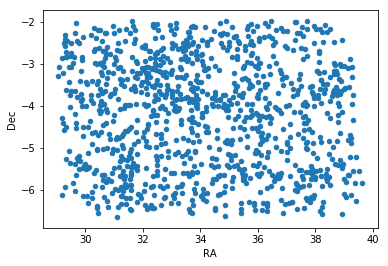

In [6]:
datacut.plot(x='RA',y='Dec',kind='scatter')

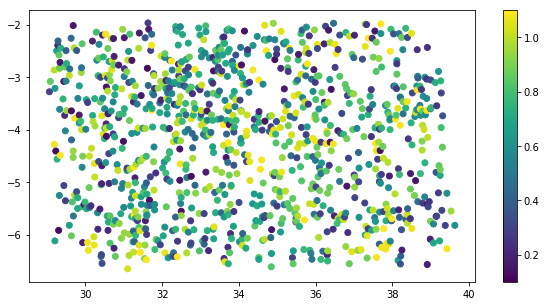

In [7]:
figure(figsize=(10,5))
sp = scatter(datacut.RA,datacut.Dec,c=datacut.z_cl,vmin=.1,vmax=1.1)
colorbar(sp)

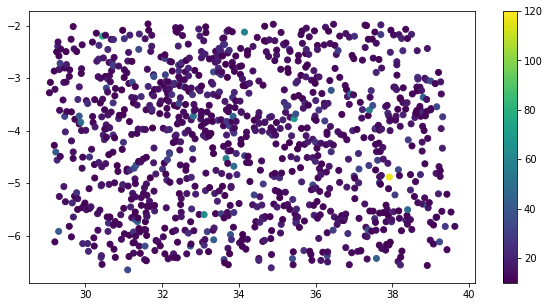

In [8]:
figure(figsize=(10,5))
sp = scatter(datacut.RA,datacut.Dec,c=datacut.N_cor,vmin=10,vmax=120)
colorbar(sp)

# break into even redshift bins:

In [9]:
dz = (datacut.z_cl.max()-datacut.z_cl.min())/3.
zbins = [datacut.z_cl.min() + dz*i for i in range(4)]
zbins

[0.12839999999999999,
 0.45226666666666671,
 0.77613333333333334,
 1.1000000000000001]

In [10]:
datacut['zbin'] = zeros(len(datacut))
for i,r in datacut.iterrows():
    if r.z_cl < zbins[1]:
        r.zbin = 0
    if r.z_cl >= zbins[1] and r.z_cl < zbins[2]:
        r.zbin = 1
    if r.z_cl >= zbins[2]:
        r.zbin = 2

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x113c20fd0>]], dtype=object)

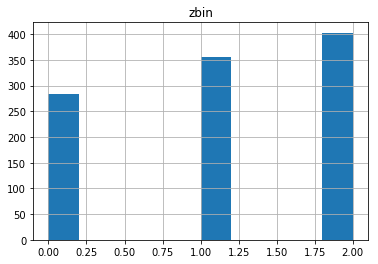

In [11]:
datacut.hist('zbin')

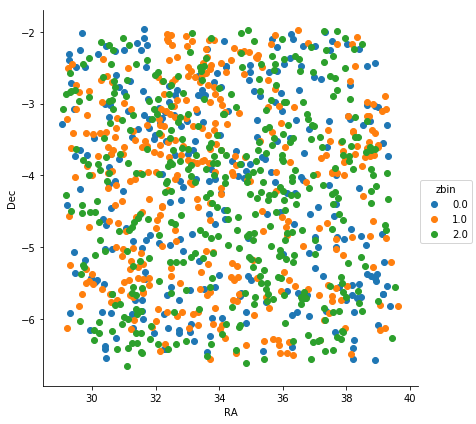

In [12]:
g = sns.FacetGrid(datacut, hue='zbin',size=6)
g = (g.map(plt.scatter, 'RA','Dec').add_legend())

# look at richness cut


In [13]:
nbins1 = [20,30]
datacut2 = datacut.copy()
datacut2['nbin'] = zeros(len(datacut2))
for i,r in datacut2.iterrows():
    if r.N_cor < nbins1[0]:
        r.nbin = 0
    if r.N_cor >= nbins1[0] and r.N_cor < nbins1[1]:
        r.nbin = 1
    if r.N_cor >= nbins1[1]:
        r.nbin = 2

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a19c7c950>]], dtype=object)

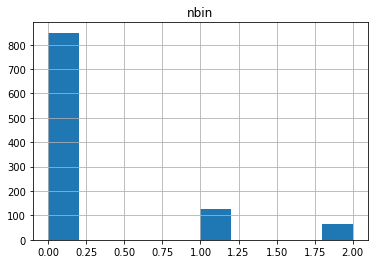

In [14]:
datacut2.hist('nbin')

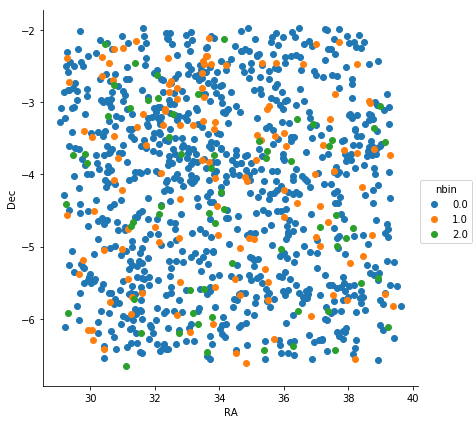

In [15]:
g = sns.FacetGrid(datacut2, hue='nbin',size=6)
g.map(scatter, 'RA','Dec').add_legend()

In [16]:
for i in range(3):
    print len(datacut2[datacut2.nbin==i])

849
128
64


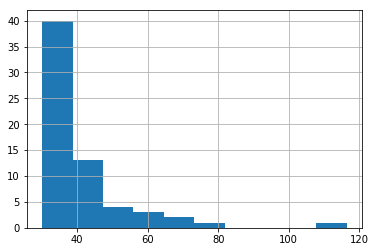

In [17]:
datacut2[datacut2.nbin==2].N_cor.hist(bins=10)

In [18]:
for i in range(3):
    print datacut2[datacut2.nbin==i].describe()

               RA         Dec        z_cl       N_cor       logMs       z_bcg  \
count  849.000000  849.000000  849.000000  849.000000  849.000000  849.000000   
mean    34.111277   -4.204750    0.684619   13.234624   12.199366   -0.541099   
std      2.802784    1.283425    0.276545    2.666211    0.134161    0.699166   
min     29.061059   -6.568352    0.132500   10.005000   11.630000   -1.000000   
25%     31.741028   -5.406812    0.478000   11.033000   12.112000   -1.000000   
50%     33.881628   -4.052364    0.723900   12.482000   12.203000   -1.000000   
75%     36.322668   -3.144706    0.921100   15.095000   12.285000    0.271890   
max     39.628319   -1.966486    1.100000   19.999000   12.557000    1.095000   

             zbin   nbin  
count  849.000000  849.0  
mean     1.176678    0.0  
std      0.787205    0.0  
min      0.000000    0.0  
25%      1.000000    0.0  
50%      1.000000    0.0  
75%      2.000000    0.0  
max      2.000000    0.0  
               RA         D

In [19]:
#how many with richness > 40?
len(datacut2[datacut2.N_cor >= 40])

21

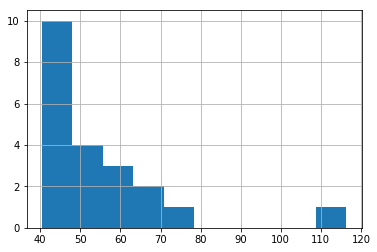

In [20]:
datacut2[datacut2.N_cor>=40].N_cor.hist()

# look at scaling


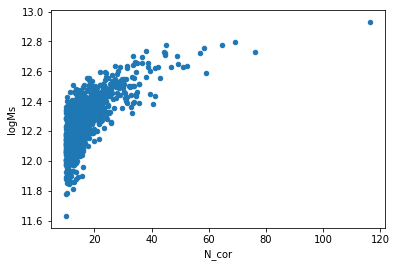

In [21]:
datacut2.plot('N_cor','logMs',kind='scatter')

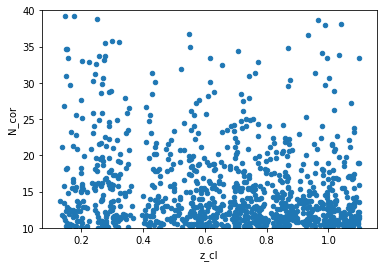

In [22]:
datacut.plot('z_cl','N_cor',kind='scatter',ylim=(10,40))

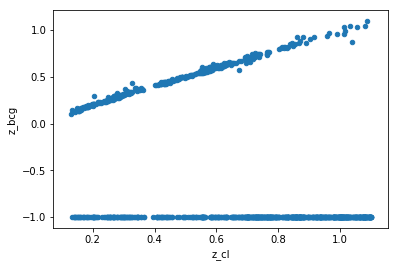

In [23]:
datacut2.plot('z_cl','z_bcg',kind='scatter')#,ylim=(0,1.2))

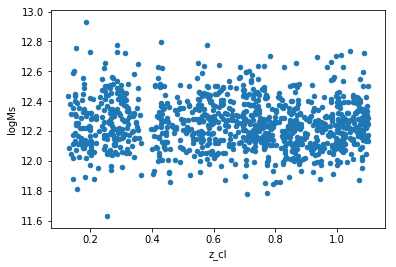

In [24]:
datacut2.plot('z_cl','logMs',kind='scatter')

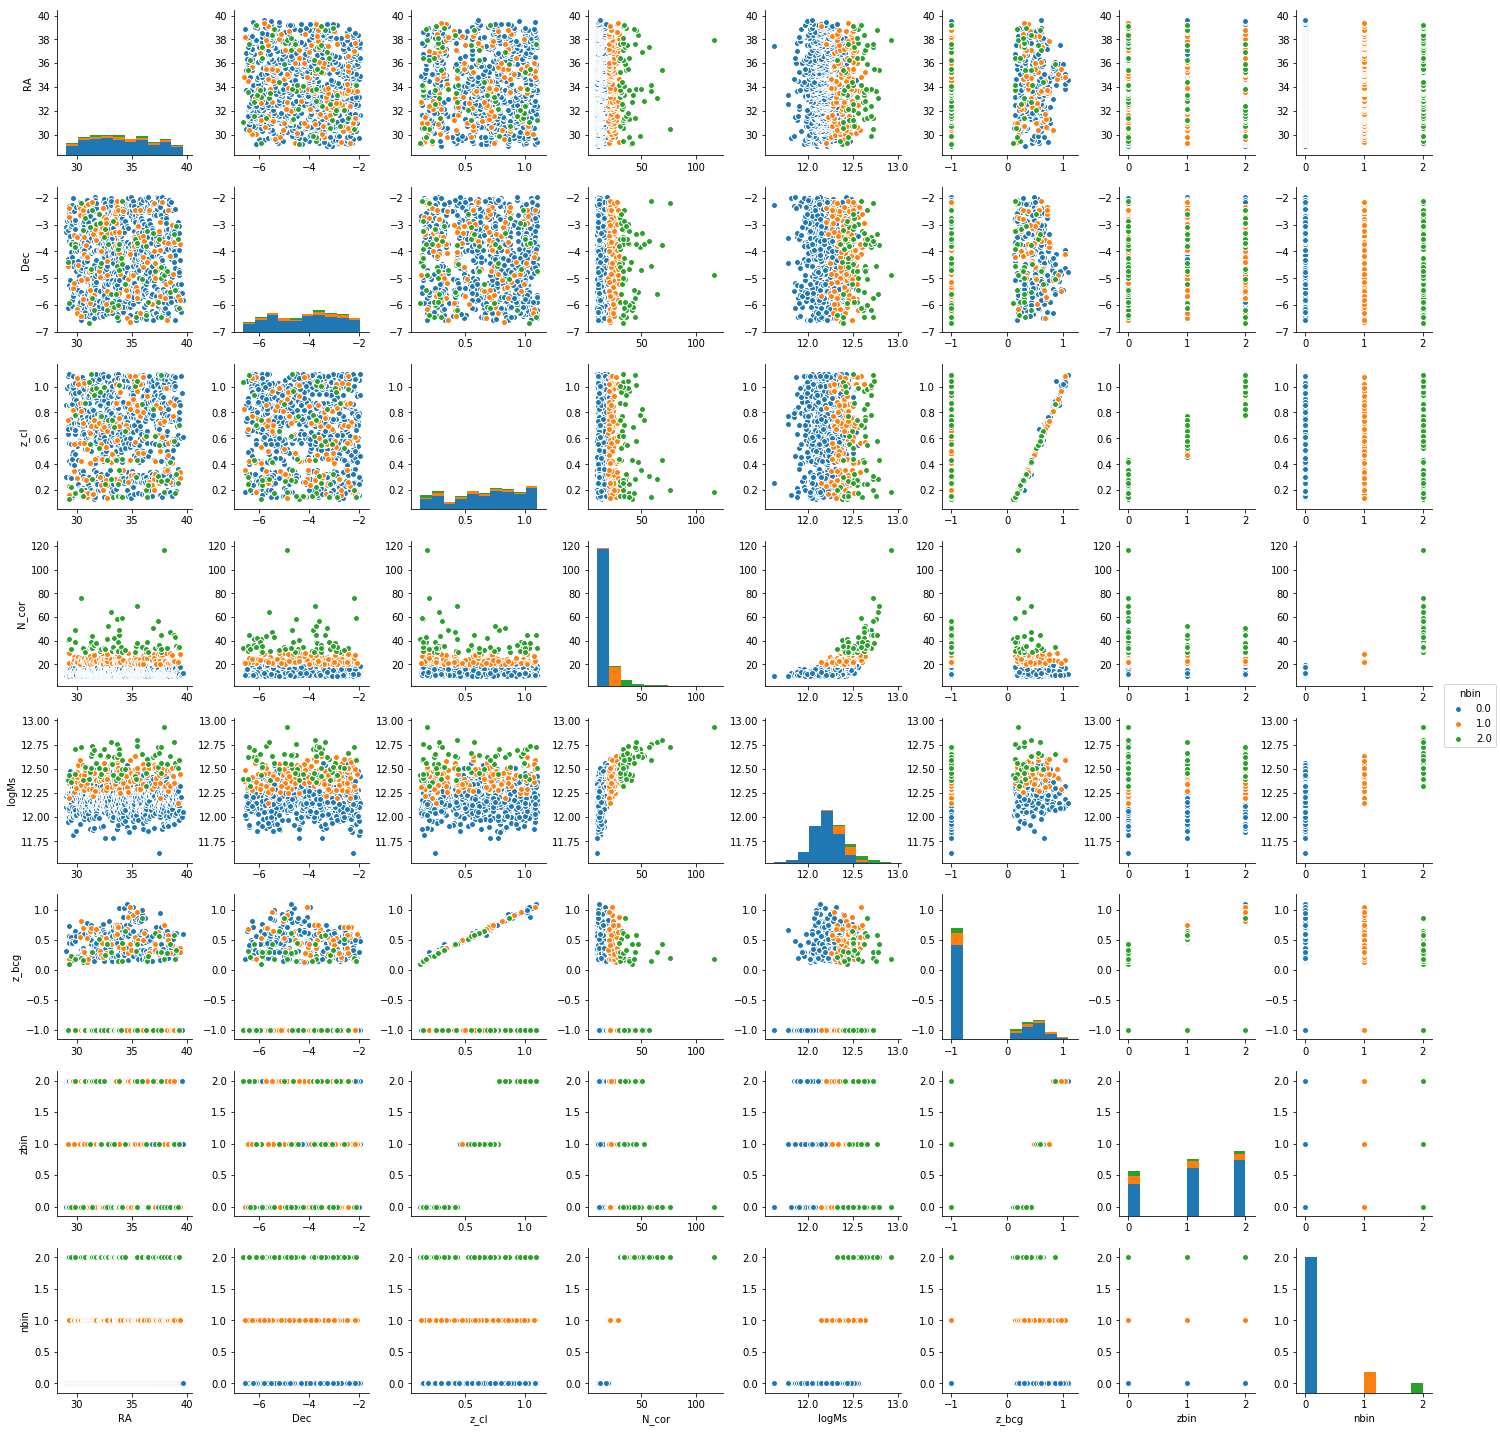

In [25]:
sns.pairplot(datacut2,hue='nbin')

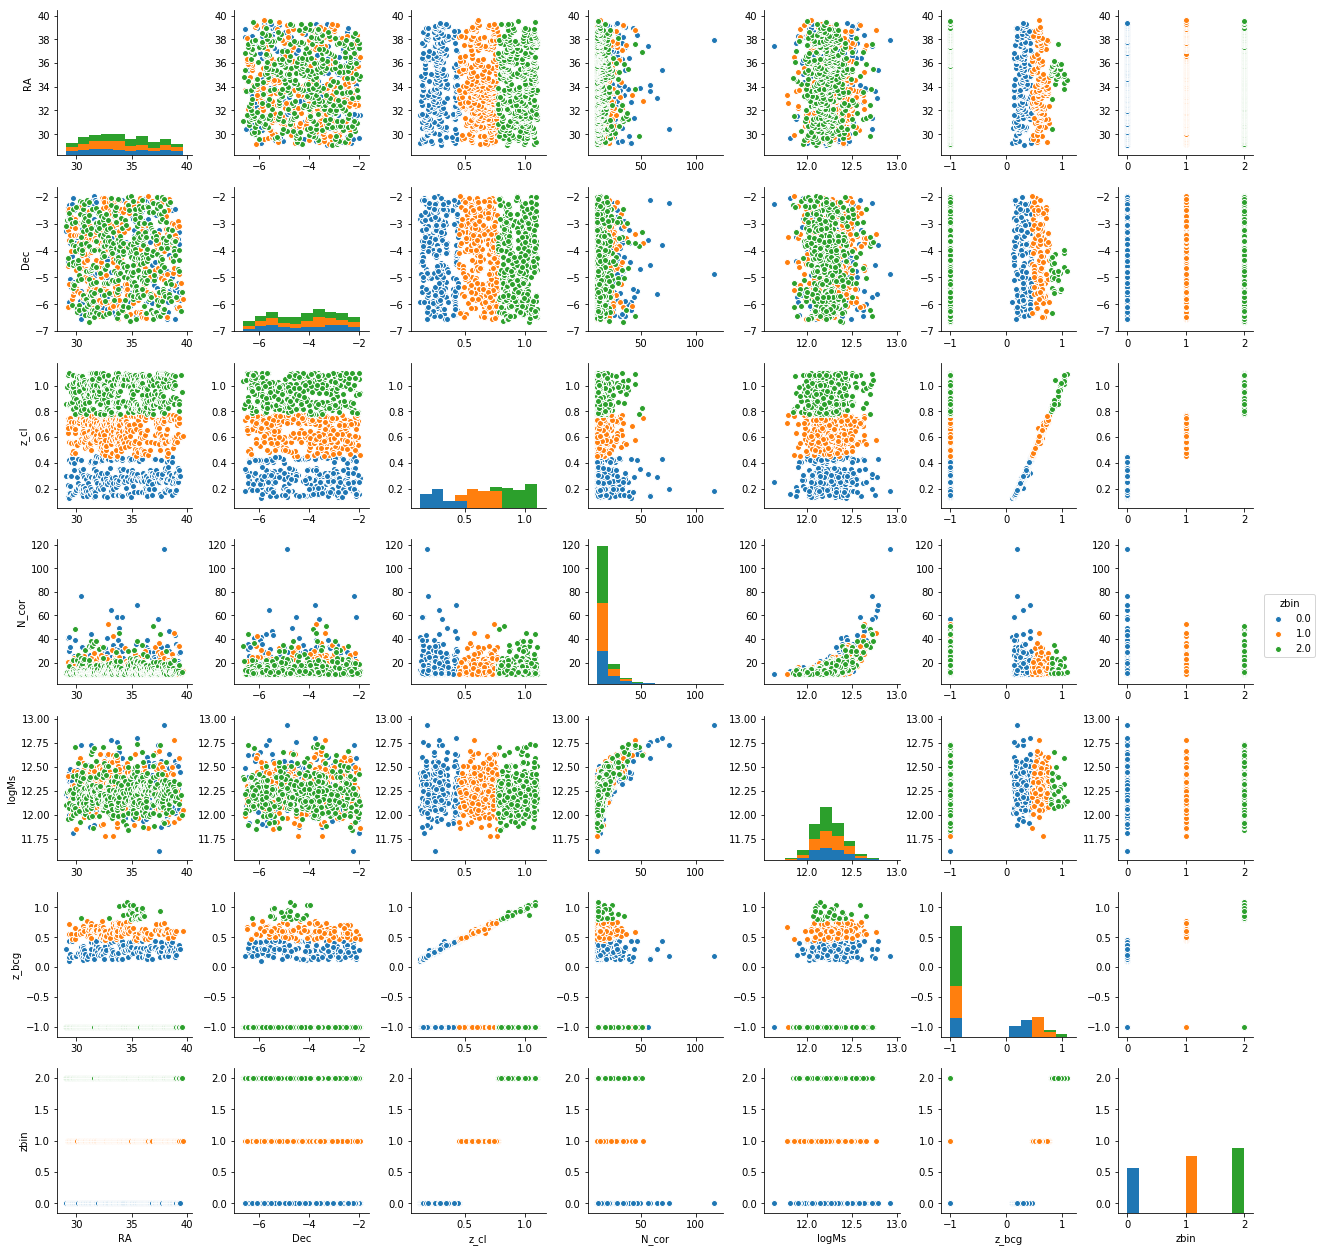

In [26]:
sns.pairplot(datacut,hue='zbin')

# save richness bin catalogs

In [27]:
labels = [1020,2030,30]
for i in range(3):
    dfs = datacut2[datacut2.nbin==i]
    dfs.to_csv('~/Dropbox/copy/camira/s16av2/data/actpol_camira_s16a_wide_v2_cut_180212_ncut_%i.dat' \
              %labels[i], index_label='#index', sep='\t')
    savetxt('data/actpol_camira_s16a_wide_v2_cut_180212_ncut_%i_stackcat.dat' %labels[i], zip(dfs.RA,dfs.Dec))

In [28]:
test = pd.read_table('~/Dropbox/copy/camira/s16av2/data/actpol_camira_s16a_wide_v2_cut_180212_ncut_30.dat')
test.head()

,#index,RA,Dec,z_cl,N_cor,logMs,z_bcg,zbin,nbin
0,6,29.226419,-4.407089,0.1341,40.439,12.382,-1.00000,0.0,2.0
1,11,29.300512,-5.918173,0.1284,41.271,12.438,0.10017,0.0,2.0
2,24,29.458833,-3.727142,0.2252,32.942,12.360,0.22286,0.0,2.0
3,52,29.836536,-3.721349,0.1777,39.272,12.451,0.17883,0.0,2.0
4,55,29.877105,-3.839806,0.7830,48.883,12.702,-1.00000,2.0,2.0


# 3 bins might not be enough, by looking at stacks. try w/ 4

In [29]:
datacut.head()

,RA,Dec,z_cl,N_cor,logMs,z_bcg,zbin
0,29.061059,-3.277845,0.3020,11.434,12.214,0.31108,0.0
1,29.085530,-3.080339,0.8542,10.996,12.108,-1.00000,2.0
2,29.184571,-2.863991,0.9922,11.613,12.243,-1.00000,2.0
3,29.187734,-4.279255,1.0800,10.531,11.955,-1.00000,2.0
4,29.202626,-6.118841,0.6880,11.245,12.128,-1.00000,1.0


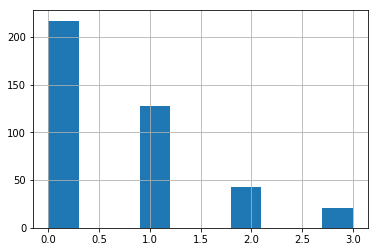

In [30]:
df = datacut.copy()
nbins = [15,20,30,40]
df['nbin'] = zeros(len(datacut))
rdrop = []
for i,r in df.iterrows():
    #print i,r.N_cor
    if r.N_cor <= nbins[0]:
    #    df.drop(i,inplace=True)
        rdrop.append(i)
    if r.N_cor > nbins[0] and  r.N_cor < nbins[1]:
        r.nbin = 0
    if r.N_cor >= nbins[1] and r.N_cor < nbins[2]:
        r.nbin = 1
    if r.N_cor >= nbins[2] and r.N_cor < nbins[3]:
        r.nbin = 2
    if r.N_cor >= nbins[3]:
        r.nbin = 3
    #print r.nbin
df.drop(rdrop,inplace=True)
labels = [1520,2030,3040,40]
for i in range(4):
    dfs = df[df.nbin==i]
    dfs.to_csv('~/Dropbox/copy/camira/s16av2/data/actpol_camira_s16a_wide_v2_cut_180212_ncut_%i.dat' \
               %labels[i], index_label='#index', sep='\t')
    savetxt('data/actpol_camira_s16a_wide_v2_cut_180212_ncut_%i_stackcat.dat' %labels[i], zip(dfs.RA,dfs.Dec))

df.to_csv('~/Dropbox/copy/camira/s16av2/data/actpol_camira_s16a_wide_v2_cut_180212_allbins.dat', \
          index_label='#index', sep='\t')
        
df.nbin.hist()

409

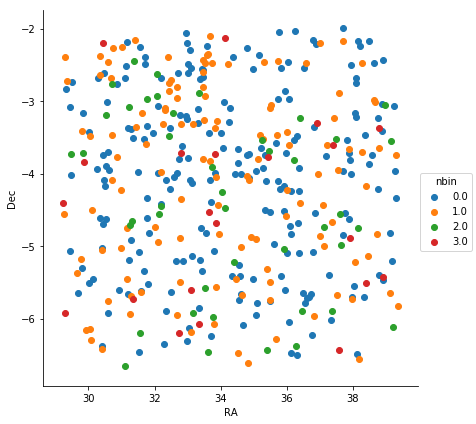

In [31]:
g = sns.FacetGrid(df, hue='nbin',size=6)
g.map(scatter, 'RA','Dec').add_legend()
g.savefig('/Users/brittanyfuzia/Downloads/camira_locations.pdf',bbox_inches='tight')
len(df)

In [32]:
pwd

u'/Users/brittanyfuzia/Dropbox/copy/camira/s16av2'

In [33]:
df.head()

,RA,Dec,z_cl,N_cor,logMs,z_bcg,zbin,nbin
6,29.226419,-4.407089,0.1341,40.439,12.382,-1.00000,0.0,3.0
8,29.260597,-4.560916,0.7380,20.868,12.405,-1.00000,1.0,1.0
9,29.277488,-2.393108,0.2300,20.843,12.199,-1.00000,0.0,1.0
11,29.300512,-5.918173,0.1284,41.271,12.438,0.10017,0.0,3.0
15,29.326064,-2.826346,0.8587,17.218,12.253,-1.00000,2.0,0.0


In [34]:
test = pd.read_table('~/Dropbox/copy/camira/s16av2/data/actpol_camira_s16a_wide_v2_cut_180212_ncut_40.dat')
test.head()

,#index,RA,Dec,z_cl,N_cor,logMs,z_bcg,zbin,nbin
0,6,29.226419,-4.407089,0.1341,40.439,12.382,-1.00000,0.0,3.0
1,11,29.300512,-5.918173,0.1284,41.271,12.438,0.10017,0.0,3.0
2,55,29.877105,-3.839806,0.7830,48.883,12.702,-1.00000,2.0,3.0
3,104,30.445157,-2.198288,0.1992,76.224,12.729,0.19338,0.0,3.0
4,213,31.354779,-5.732349,0.2885,44.343,12.731,0.29517,0.0,3.0


In [35]:
df.head()

,RA,Dec,z_cl,N_cor,logMs,z_bcg,zbin,nbin
6,29.226419,-4.407089,0.1341,40.439,12.382,-1.00000,0.0,3.0
8,29.260597,-4.560916,0.7380,20.868,12.405,-1.00000,1.0,1.0
9,29.277488,-2.393108,0.2300,20.843,12.199,-1.00000,0.0,1.0
11,29.300512,-5.918173,0.1284,41.271,12.438,0.10017,0.0,3.0
15,29.326064,-2.826346,0.8587,17.218,12.253,-1.00000,2.0,0.0


In [36]:
for i in range(4):
    print df[df.nbin==i].describe()

               RA         Dec       z_cl       N_cor       logMs       z_bcg  \
count  217.000000  217.000000  217.00000  217.000000  217.000000  217.000000   
mean    34.326668   -4.085430    0.62899   17.140751   12.306184   -0.383471   
std      2.721833    1.215880    0.27419    1.471691    0.110589    0.745819   
min     29.326064   -6.501460    0.14400   15.033000   11.901000   -1.000000   
25%     32.118005   -5.142270    0.35600   15.812000   12.241000   -1.000000   
50%     34.357798   -3.986904    0.64490   16.927000   12.310000   -1.000000   
75%     36.364422   -3.114838    0.84000   18.217000   12.379000    0.437340   
max     39.303554   -1.984179    1.09790   19.999000   12.557000    1.041360   

             zbin   nbin  
count  217.000000  217.0  
mean     1.027650    0.0  
std      0.781245    0.0  
min      0.000000    0.0  
25%      0.000000    0.0  
50%      1.000000    0.0  
75%      2.000000    0.0  
max      2.000000    0.0  
               RA         Dec       

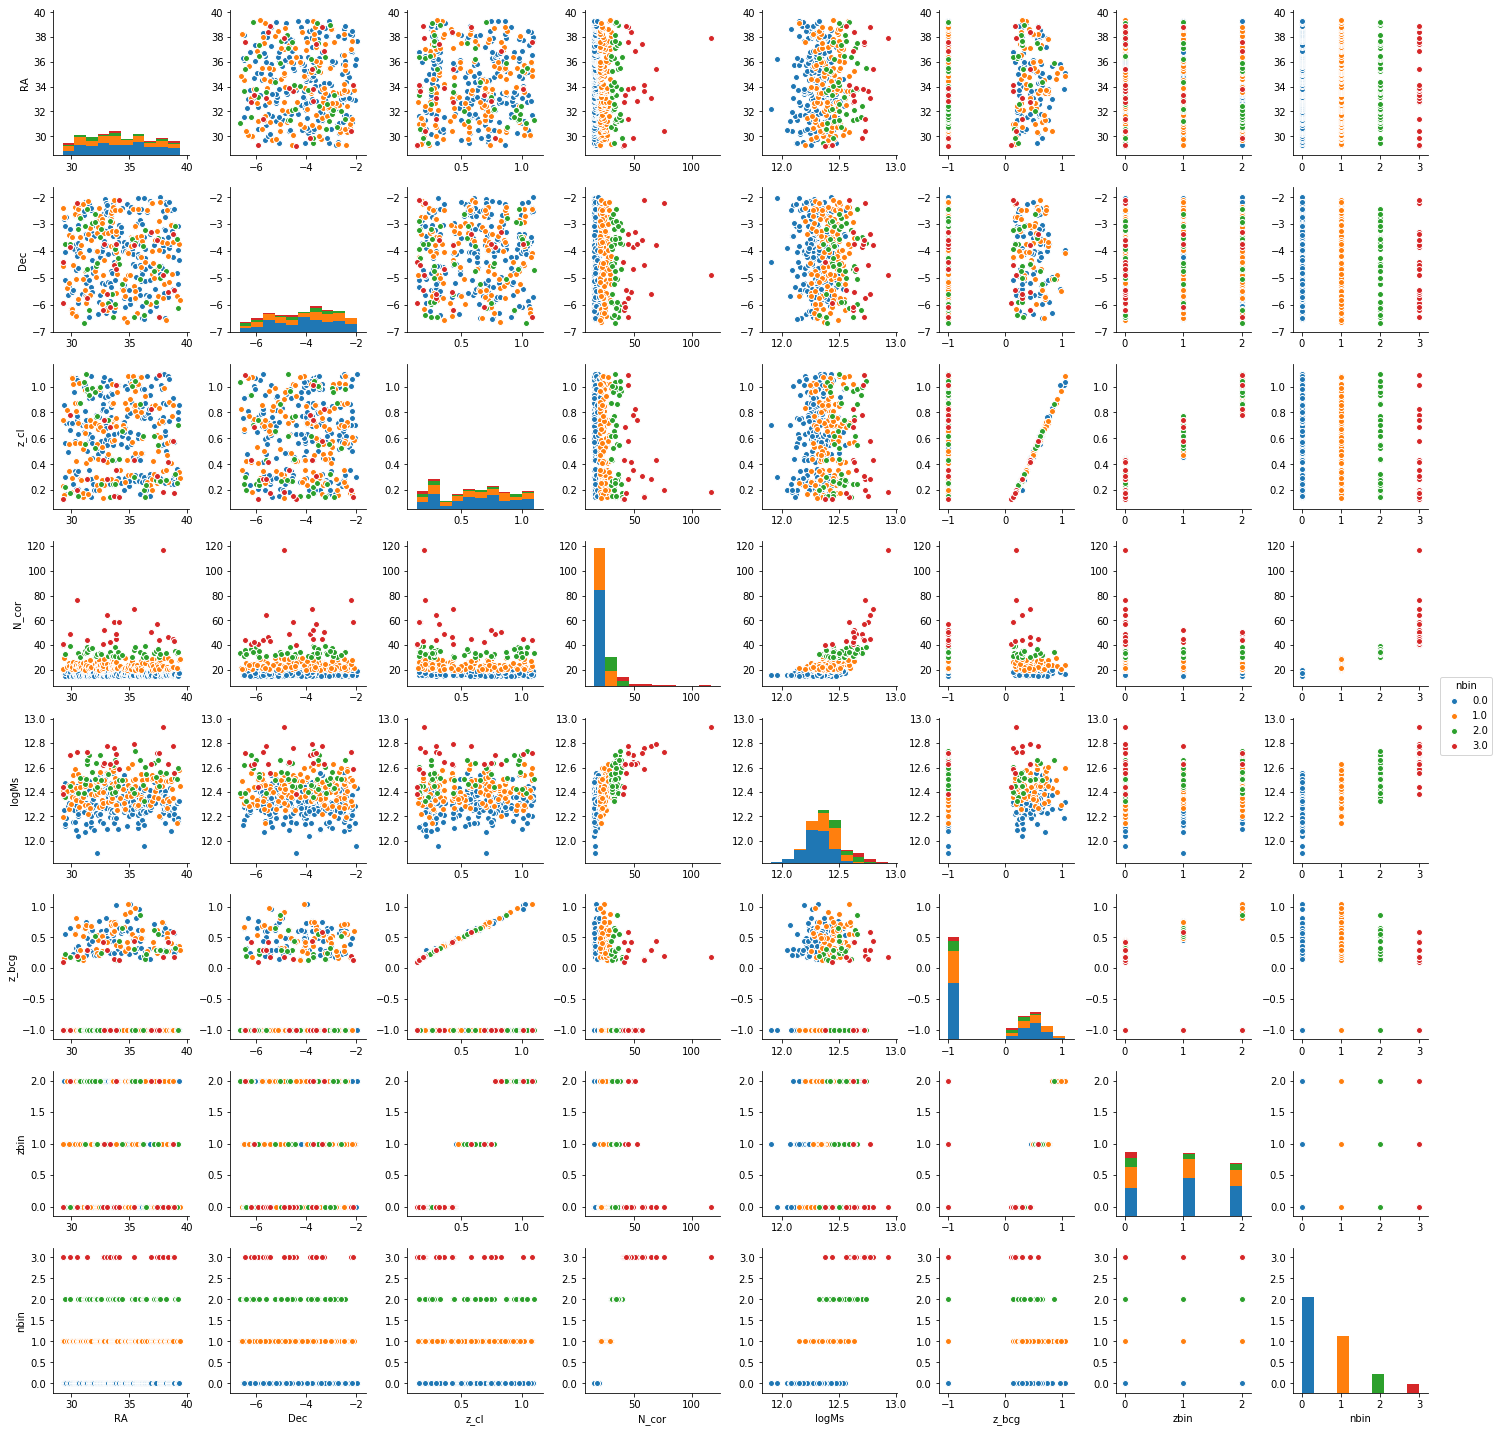

In [37]:
sns.pairplot(df,hue='nbin')

# Look for clusters in act

In [38]:
alldata = pd.read_table('data/camira_s16a_wide_v2.dat',delim_whitespace=True,escapechar="#")
alldata.columns = alldata.columns.str.strip()
actdata = alldata[(alldata.RA<=133.98) & (alldata.RA>=128.06) & (alldata.Dec<=2.46) & (alldata.Dec>=-1.48)]
actdata.head()

,,RA,Dec,z_cl,N_cor,logMs,z_bcg


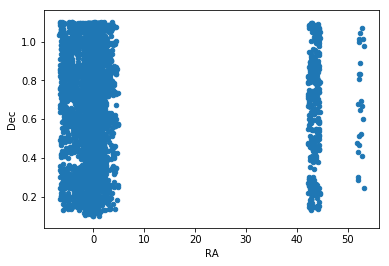

In [39]:
alldata.plot('RA','Dec',kind='scatter')

In [40]:
datacut[datacut.N_cor==max(datacut.N_cor)]

,RA,Dec,z_cl,N_cor,logMs,z_bcg,zbin
919,37.921558,-4.882586,0.1865,116.387,12.931,0.18521,0.0


In [41]:
datacut.sort_values('N_cor',ascending=0).head()

,RA,Dec,z_cl,N_cor,logMs,z_bcg,zbin
919,37.921558,-4.882586,0.1865,116.387,12.931,0.18521,0.0
104,30.445157,-2.198288,0.1992,76.224,12.729,0.19338,0.0
678,35.440593,-3.771894,0.4296,69.253,12.797,0.43288,0.0
420,33.093684,-5.598911,0.2874,64.619,12.777,0.30139,0.0
554,34.145056,-2.121889,0.1440,58.981,12.589,0.13916,0.0


In [42]:
#look at all clusters w/ N>15

In [43]:
finaldf = df[df.N_cor > 15.]
finaldf.describe()

,RA,Dec,z_cl,N_cor,logMs,z_bcg,zbin,nbin
count,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000
mean,34.194918,-4.134021,0.600389,22.821132,12.380741,-0.363991,0.941320,0.677262
std,2.757034,1.245409,0.283495,9.962916,0.145786,0.739120,0.805301,0.859489
min,29.226419,-6.651996,0.128400,15.033000,11.901000,-1.000000,0.000000,0.000000
25%,31.968078,-5.196242,0.315100,16.855000,12.283000,-1.000000,0.000000,0.000000
50%,33.867649,-3.986904,0.616000,19.691000,12.372000,-1.000000,1.000000,0.000000
75%,36.364422,-3.121683,0.827900,24.830000,12.462000,0.413320,2.000000,1.000000
max,39.377673,-1.984179,1.100000,116.387000,12.931000,1.042080,2.000000,3.000000


# Look at splitting into redshift bins

In [44]:
df.z_cl.describe()

count    409.000000
mean       0.600389
std        0.283495
min        0.128400
25%        0.315100
50%        0.616000
75%        0.827900
max        1.100000
Name: z_cl, dtype: float64

In [45]:
for i,r in df.iterrows():
    if r.z_cl < df.z_cl.mean():
        r.zbin = 0
    if r.z_cl >= df.z_cl.mean():
        r.zbin = 1

In [46]:
for n in range(4):
    for z in range(2):
        print n,z
        print df[df.zbin==z][df.nbin==n].describe()

0 0
              RA        Dec       z_cl      N_cor      logMs      z_bcg  zbin  \
count  95.000000  95.000000  95.000000  95.000000  95.000000  95.000000  95.0   
mean   34.338158  -4.002489   0.365998  17.219021  12.289147  -0.062990   0.0   
std     2.857110   1.175549   0.142092   1.509065   0.116403   0.666366   0.0   
min    29.434651  -6.380755   0.144000  15.042000  11.959000  -1.000000   0.0   
25%    31.781845  -5.047233   0.251000  15.829500  12.210000  -1.000000   0.0   
50%    34.276320  -3.993453   0.318000  17.136000  12.293000   0.262040   0.0   
75%    36.365534  -3.049782   0.500000  18.312500  12.375500   0.469900   0.0   
max    39.200253  -2.028901   0.598000  19.942000  12.557000   0.615570   0.0   

       nbin  
count  95.0  
mean    0.0  
std     0.0  
min     0.0  
25%     0.0  
50%     0.0  
75%     0.0  
max     0.0  
0 1
               RA         Dec        z_cl       N_cor       logMs       z_bcg  \
count  122.000000  122.000000  122.000000  122.000000  

/Users/brittanyfuzia/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [47]:
nlabels = [1520,2030,3040,40]
zlabels = [0,1]
for n,ncut in enumerate(nlabels):
        for z in zlabels:
            dfs = df[df.nbin==n][df.zbin==z]
            dfs.to_csv('~/Dropbox/copy/camira/s16av2/data/actpol_camira_s16a_wide_v2_cut_180212_ncut_%i_zbin_%i.dat' \
               %(ncut,z), index_label='#index', sep='\t')
            savetxt('data/actpol_camira_s16a_wide_v2_cut_180212_ncut_%i_zbin_%i_stackcat.dat' %(ncut,z), zip(dfs.RA,dfs.Dec))

df.to_csv('~/Dropbox/copy/camira/s16av2/data/actpol_camira_s16a_wide_v2_cut_180212_allbins.dat', \
          index_label='#index', sep='\t')


/Users/brittanyfuzia/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


# Add a column for the weights from ryoma

In [48]:
import glob
from scipy.interpolate import interp1d
weights = glob.glob('/Users/brittanyfuzia/Dropbox/copy/camira/s16av2/ryomaweight/z_w_s16aACT_lensing_measurements_Pcut0.10_rich*_z0.0000_1.2000_photozdemp_om0.3000.dat.txt')
weights.sort()
zlist = [loadtxt(i,usecols=[0]) for i in weights]
wlist = [loadtxt(i,usecols=[1]) for i in weights]
winterp = [interp1d(zlist[i],wlist[i]) for i,j in enumerate(weights)]
df['weight'] = zeros(len(df))
df.head()
    

,RA,Dec,z_cl,N_cor,logMs,z_bcg,zbin,nbin,weight
6,29.226419,-4.407089,0.1341,40.439,12.382,-1.00000,0.0,3.0,0.0
8,29.260597,-4.560916,0.7380,20.868,12.405,-1.00000,1.0,1.0,0.0
9,29.277488,-2.393108,0.2300,20.843,12.199,-1.00000,0.0,1.0,0.0
11,29.300512,-5.918173,0.1284,41.271,12.438,0.10017,0.0,3.0,0.0
15,29.326064,-2.826346,0.8587,17.218,12.253,-1.00000,1.0,0.0,0.0


In [49]:
for i,r in df.iterrows():
    r.weight = winterp[int(r.nbin)](r.z_cl)
df.head()

,RA,Dec,z_cl,N_cor,logMs,z_bcg,zbin,nbin,weight
6,29.226419,-4.407089,0.1341,40.439,12.382,-1.00000,0.0,3.0,0.002096
8,29.260597,-4.560916,0.7380,20.868,12.405,-1.00000,1.0,1.0,0.001209
9,29.277488,-2.393108,0.2300,20.843,12.199,-1.00000,0.0,1.0,0.007732
11,29.300512,-5.918173,0.1284,41.271,12.438,0.10017,0.0,3.0,0.001954
15,29.326064,-2.826346,0.8587,17.218,12.253,-1.00000,1.0,0.0,0.000949


In [50]:
labels = [1520,2030,3040,40]
for i in range(4):
    dfs = df[df.nbin==i]
    dfs.to_csv('~/Dropbox/copy/camira/s16av2/data/actpol_camira_s16a_wide_v2_cut_180212_ncut_%i.dat' \
               %labels[i], index_label='#index', sep='\t')
    savetxt('data/actpol_camira_s16a_wide_v2_cut_180212_ncut_%i_stackcat_weights.dat' %labels[i], zip(dfs.RA,dfs.Dec,dfs.weight))

df.to_csv('~/Dropbox/copy/camira/s16av2/data/actpol_camira_s16a_wide_v2_cut_180212_allbins.dat', \
          index_label='#index', sep='\t')
 

In [ ]:
#how has effective redshift